In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import ast

In [17]:
method = "smoothgrad"
model = "mlp_lff_b"
dataset = "cmnist"
metric = 'EffectiveComplexity'

In [18]:
values = pd.read_csv(f"{method}_{model}_{dataset}_{metric}.csv", header = None).values.flatten()
align_conflict = pd.read_csv("align_conflict.csv", index_col = 0)['bias'].values.flatten()

In [19]:
align_conflict = [x.strip().split("[")[-1].split(']')[0].split(" ") for x in align_conflict]
align_conflict = np.array(align_conflict).astype(np.int64).flatten()

In [20]:
val_align = values[align_conflict == 1]
val_conflict = values [align_conflict == 0]

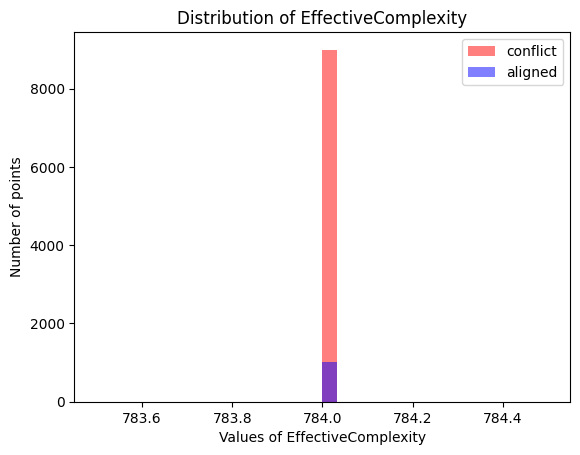

In [21]:
plt.hist(val_conflict, bins=30, color= "r", alpha = 0.5, label = 'conflict')
plt.hist(val_align, bins = 30, color= "b", alpha = 0.5, label = 'aligned')
plt.xlabel(f"Values of {metric}")
plt.ylabel(f"Number of points")
plt.title(f"Distribution of {metric}")
plt.legend()
plt.savefig(f"{method}_{model}_{dataset}_{metric}.png")
plt.show()